In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
import cartopy.crs as ccrs
import cartopy.feature
from cartopy.mpl.patch import geos_to_path
import numpy as np
import itertools
import sys
sys.path.append('../')
import pygtool

In [2]:
aerosol=pygtool.read3D('./aerosol.clim',count=4).getarr()
s,a,b       =pygtool.readalt().getsig_pa_beta()
lon,lat     =pygtool.readgrid().getlonlat()
reverse_s=1-s

/home/onishi/anaconda3/envs/py36work/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: No contour levels were found within the data range.


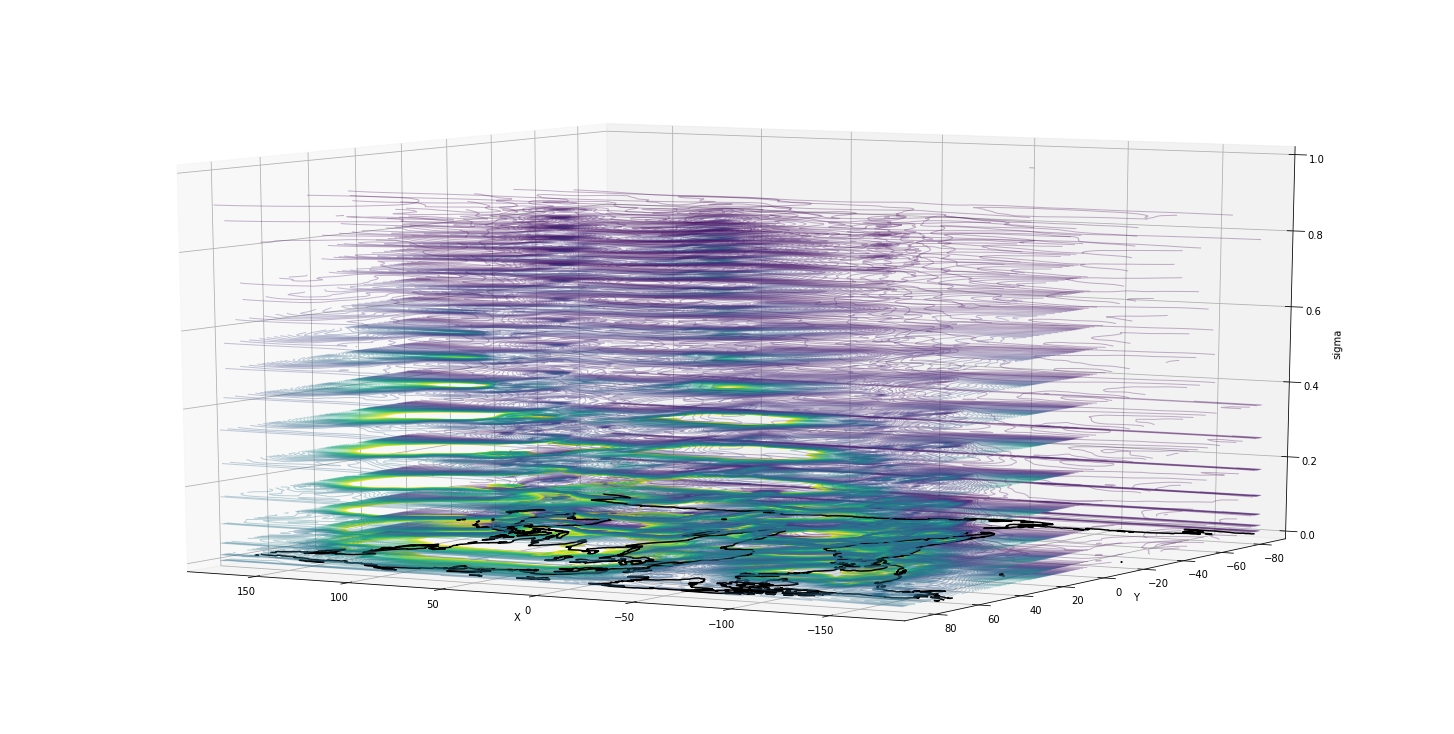

In [35]:
target_projection = ccrs.PlateCarree()
feature = cartopy.feature.NaturalEarthFeature('physical', 'coastline', '110m')
geoms = feature.geometries()
geoms = [target_projection.project_geometry(geom, feature.crs)
         for geom in geoms]
paths = list(itertools.chain.from_iterable(geos_to_path(geom) for geom in geoms))
segments = []
for path in paths:
    vertices = [vertex for vertex, _ in path.iter_segments()]
    vertices = np.asarray(vertices)
    segments.append(vertices)

fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig, xlim=[180,-180], ylim=[-90, 90])
ax.set_zlim(bottom=0)
lc = LineCollection(segments, color='black')
ax.add_collection3d(lc)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('sigma')
arr=np.zeros_like(aerosol)
arr[:,:,0:64]=aerosol[:,:,64:]
arr[:,:,64:]=aerosol[:,:,0:64]
arr*=1e12
lon2=lon.copy()
lon2-=180
xx,yy=np.meshgrid(lon2,lat)
levels=np.arange(0,100,1)
for k in range(36):
    ax.contour(xx,yy,arr[k,:,:],levels=levels,zdir='z',offset=reverse_s[k],extend='max',alpha=0.3,linewidths=1)
ax.set_ylim(90,-90)
ax.view_init(10, 300)